In [64]:
ID = '007'

In [65]:
import pandas as pd

# Load the CSV file, skipping the first line
df_manual_prime2 = pd.read_csv(f'{ID}/calibration/manual_prime2_logger-{ID}.csv', skiprows=1, low_memory=False)

# Extract the timestamp from the first column and add it as a new column
df_manual_prime2['timestamp'] = df_manual_prime2.iloc[:, 0].str.extract(r'\[(.*?)\]')

# Extract the fingerID column
df_manual_prime2['fingerID'] = df_manual_prime2.iloc[:, 1]

# Filter out rows where fingerID is 0
df_manual_prime2 = df_manual_prime2[df_manual_prime2['fingerID'] != 0]

# Filter columns that contain "bending_normalized" in their name
bending_normalized_columns = [col for col in df_manual_prime2.columns if 'pip_joint_finger_bending_normalized' in col or 'dip_joint_finger_bending_normalized' in col]

# Create a DataFrame with the timestamp and the filtered columns
df_bending_normalized = df_manual_prime2[['timestamp', 'fingerID'] + bending_normalized_columns]

# Convert the bending_normalized columns to float
for col in bending_normalized_columns:
    df_bending_normalized[col] = pd.to_numeric(df_bending_normalized[col], errors='coerce')

# Display the data of the filtered columns and the average
print(df_bending_normalized)

# Calculate the sum of pip_joint_finger_bending_normalized and dip_joint_finger_bending_normalized for each row
df_bending_normalized['bending_sum'] = (df_bending_normalized[' pip_joint_finger_bending_normalized'] + df_bending_normalized[' dip_joint_finger_bending_normalized'])/2

# Group by timestamp and calculate the average of the bending_sum across all fingers
df_avg_bending = df_bending_normalized.groupby('timestamp')['bending_sum'].mean().reset_index()

# Rename the columns
df_avg_bending.columns = ['timestamp', 'average_bending_sum']
df_avg_bending['timestamp'] = pd.to_datetime(df_avg_bending['timestamp'])

# Display the new DataFrame
print(df_avg_bending)

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_88290/639182541.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bending_normalized[col] = pd.to_numeric(df_bending_normalized[col], errors='coerce')
/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_88290/639182541.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bending_normalized['bending_sum'] = (df_bending_normalized[' pip_joint_finger_bending_normalized'] + df_bending_normalized[' dip_joint_finger_bending_normalized'])/2

                      timestamp  fingerID  \
1       2025-03-04 15:17:59.983       1.0   
2       2025-03-04 15:17:59.983       2.0   
3       2025-03-04 15:17:59.983       3.0   
4       2025-03-04 15:17:59.983       4.0   
6       2025-03-04 15:17:59.998       1.0   
...                         ...       ...   
527076  2025-03-04 15:50:19.009       1.0   
527077  2025-03-04 15:50:19.010       2.0   
527078  2025-03-04 15:50:19.011       3.0   
527079  2025-03-04 15:50:19.012       4.0   
527080  2025-03-04 15:50:19.752       NaN   

         pip_joint_finger_bending_normalized  \
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
6                                        0.0   
...                                      ...   
527076                                   0.0   
527077                                   0.0   
527078                     

In [66]:
import re

# Define the path to the log file
log_file_path = f'{ID}/calibration/{ID}.log'

# Read the log file
with open(log_file_path, "r") as file:
    log_data = file.readlines()

# Initialize lists to store timestamps and descriptions
timestamps = []
descriptions = []

# Regular expression to extract timestamp and description
log_pattern = re.compile(r"(\d{4}-\d{2}-\d{2}_\d{6}_\d{6})\s+(.*)")

# Process each line in the log file
for line in log_data:
    match = log_pattern.search(line)
    if match:
        timestamps.append(match.group(1))  # Extract timestamp
        descriptions.append(match.group(2))  # Extract description

# Create a DataFrame
df_log = pd.DataFrame({"timestamp": timestamps, "description": descriptions})

# Convert the timestamp to a datetime format
df_log["timestamp"] = pd.to_datetime(df_log["timestamp"], format="%Y-%m-%d_%H%M%S_%f")

# Display the DataFrame
print(df_log)

                      timestamp  \
0    2025-03-04 15:18:08.177486   
1    2025-03-04 15:18:49.435733   
2    2025-03-04 15:18:51.445665   
3    2025-03-04 15:18:51.467177   
4    2025-03-04 15:19:02.890304   
...                         ...   
1405 2025-03-04 15:49:51.817130   
1406 2025-03-04 15:49:51.819163   
1407 2025-03-04 15:49:53.910378   
1408 2025-03-04 15:49:53.912463   
1409 2025-03-04 15:49:53.912463   

                                            description  
0                                      Start experiment  
1                           display and wait 2 seconds   
2                                          Start Biocal  
3                    ------ Starting Biocal EEG -------  
4                                    Biocal_eyes_closed  
...                                                 ...  
1405  Asked to continue next Motor tasks Motor_execu...  
1406                      display and wait 1.0 seconds   
1407      User pressed key to continue Motor_execution   

/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_88290/4036396281.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_avg_bending['elapsed_time'] = (segment_avg_bending['timestamp'] - start_time).dt.total_seconds()
/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_88290/4036396281.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/var/folders/8z/lyrry3554djbqwn014snlnzc0000gn/T/ipykernel_88290/4036396281.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

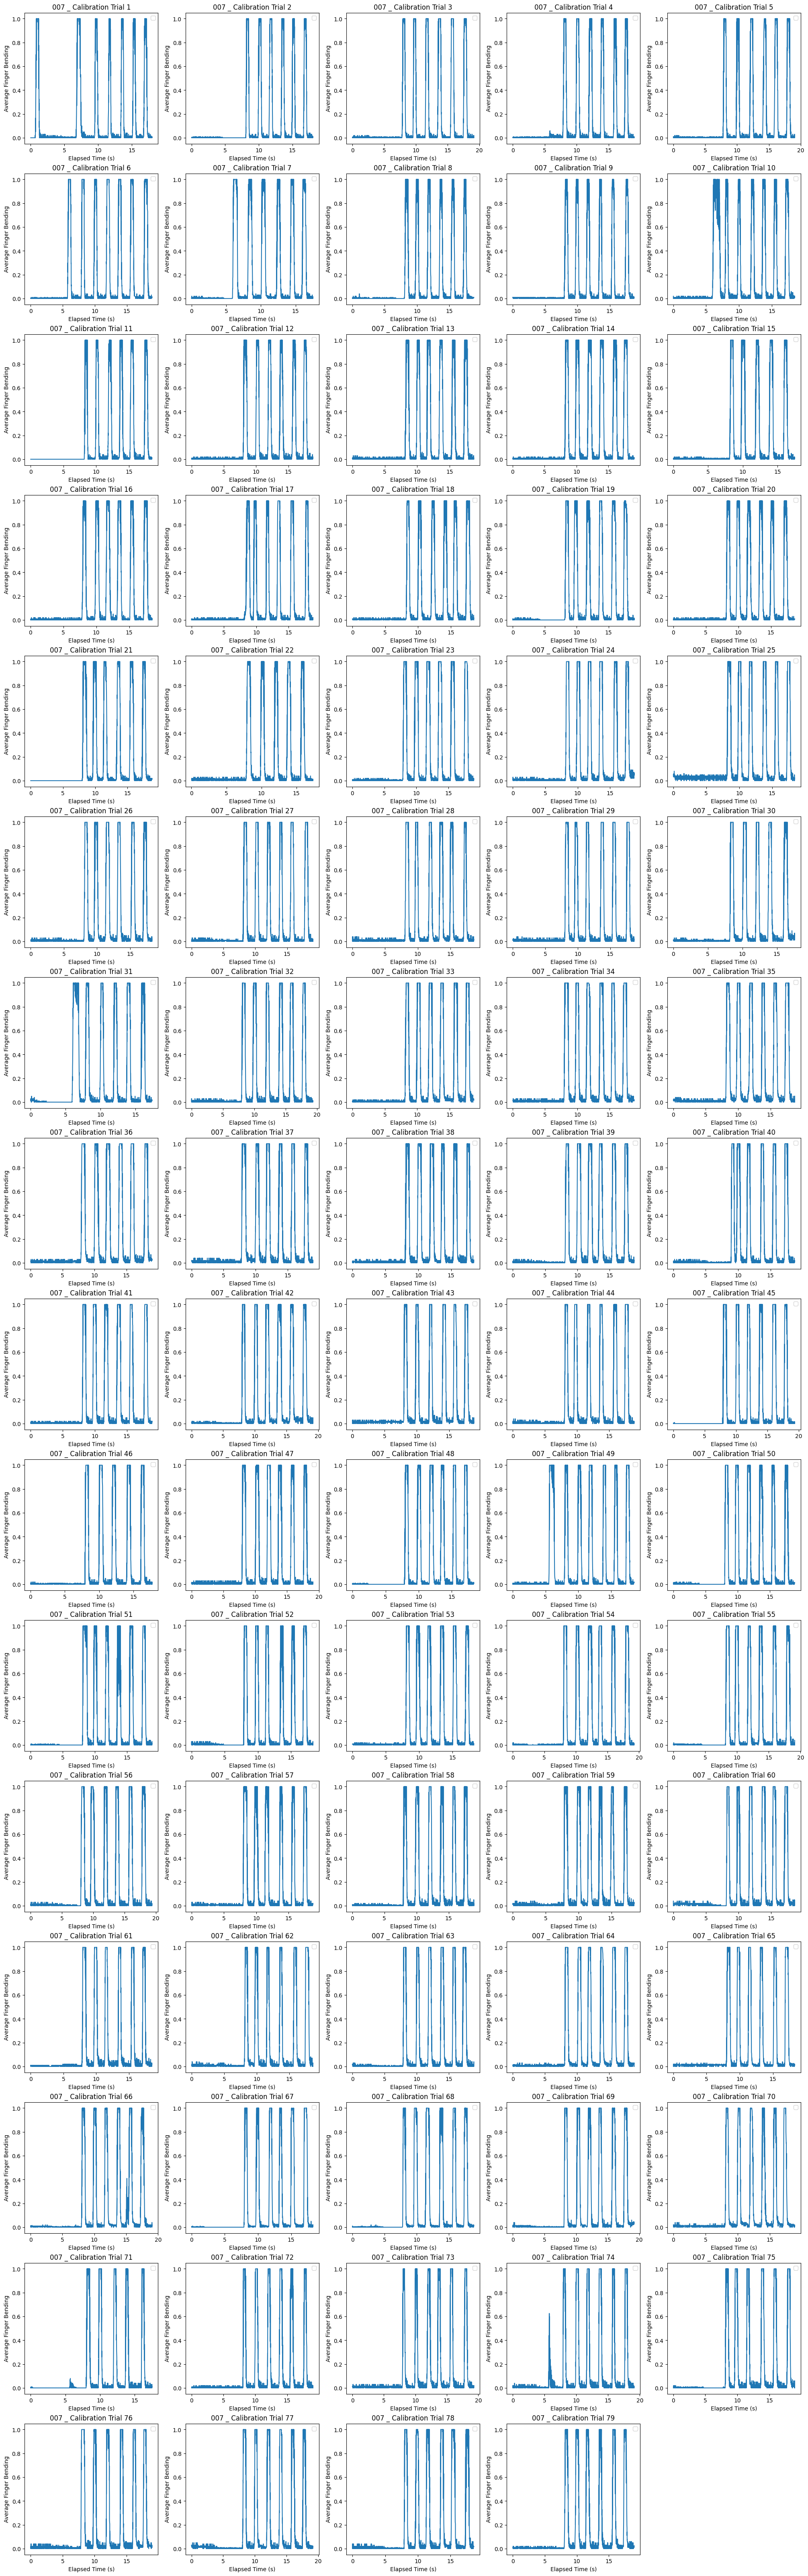

In [68]:
import matplotlib.pyplot as plt
import math

# Find the indices where the description contains 'Starting block'
start_indices = df_log[df_log['description'].str.contains('Starting block', case=False, na=False)].index
end_indices = df_log[df_log['description'].str.contains('Finished block', case=False, na=False)].index

# Add the end index for the last segment
# start_indices = list(start_indices) + [len(df_log)]

# Separate the DataFrame into segments
segments = []
for i in range(len(start_indices) - 1):
    start_idx = start_indices[i]
    end_idx = end_indices[i]
    segment = df_log.iloc[start_idx:end_idx]
    segments.append(segment)

# Determine the number of rows and columns for the subplots
num_segments = len(segments)
cols = 5  # Number of columns in the grid
rows = math.ceil(num_segments / cols)  # Calculate the number of rows needed

# Create a single figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot the time series for each segment
for idx, segment in enumerate(segments):
    # Get the start and end timestamps for the segment
    start_time = segment['timestamp'].iloc[0] # Skip the 'Starting REST' and 'Finished REST'
    end_time = segment['timestamp'].iloc[-1]
    
    # Filter df_avg_bending to match timestamps within the segment
    segment_avg_bending = df_avg_bending[
        (df_avg_bending['timestamp'] >= start_time) & (df_avg_bending['timestamp'] <= end_time)
    ]

    # Calculate elapsed time in seconds
    segment_avg_bending['elapsed_time'] = (segment_avg_bending['timestamp'] - start_time).dt.total_seconds()
    
    # Plot the time series in the corresponding subplot
    ax = axes[idx]
    ax.plot(segment_avg_bending['elapsed_time'], segment_avg_bending['average_bending_sum'])
    ax.set_xlabel('Elapsed Time (s)')
    ax.set_ylabel('Average Finger Bending')
    ax.set_title(f'{ID} _ Calibration Trial {idx + 1}')
    ax.legend()

# Hide any unused subplots
for idx in range(num_segments, len(axes)):
    axes[idx].axis('off')

# Save the combined plot
plt.savefig(f'{ID}/calibration/calibration_{ID}.png')
plt.show()